In [1]:
import matplotlib.pyplot as plt
from skimage import io, exposure
import numpy as np

## Utility Functions

In [2]:
def do_histogram(image, is_flattened=False):
    if not is_flattened:
        image = image.flatten()

    hist, bins = np.histogram(image, bins=256, range=[0, 256])
    bins = bins[1:]
    return hist, bins

def normalize(np_array: np.ndarray):
    np_array_max = np_array.max()
    normalized_array = np.array([number/np_array_max for number in np_array]).astype(np.float32)
    return normalized_array

def to_255(image):
    return (image * 255).astype(np.uint8)

def equalize_image(image, normalized_cdf: np.ndarray):
    new_image = normalized_cdf[image]
    return to_255(new_image)

## Image Visualization and Procesing

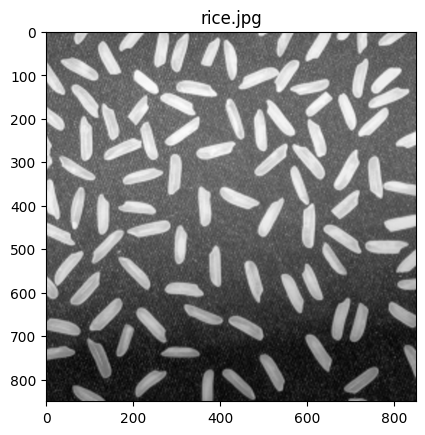

In [3]:
image = io.imread('images/rice.jpg', as_gray=True)
image = to_255(image)

plt.figure()
plt.imshow(image, cmap='grey')
plt.title("rice.jpg")
plt.show()

In [5]:
hist, bins = do_histogram(image)
# We compute the CDF
cdf = hist.cumsum()

# We normalize both the CDF asd the histogram
normalized_cdf = normalize(cdf)
normalized_hist = normalize(hist)

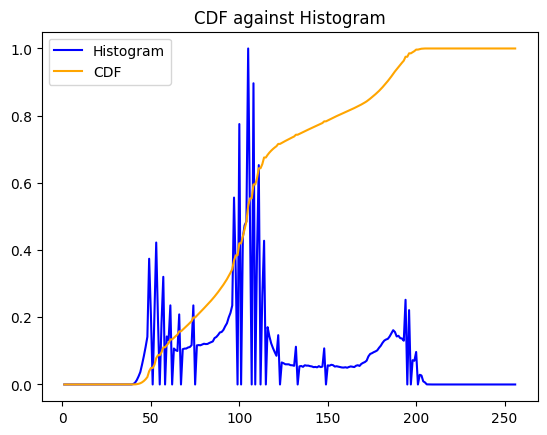

In [6]:
plt.figure()
plt.plot(bins, normalized_hist, color='blue', label='Histogram')
plt.plot(bins, normalized_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

## Image Equalization

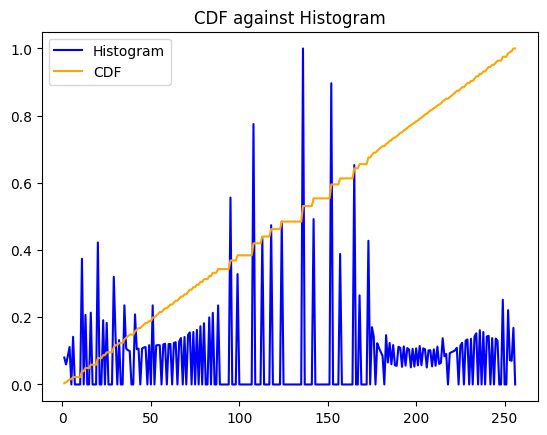

In [8]:
# Map original pixels to equalized values using the CDF
new_image = equalize_image(image, normalized_cdf)
hist, bins = do_histogram(new_image)
hist = normalize(hist)

# We compute the CDF
new_cdf = hist.cumsum()
normalized_new_cdf = normalize(new_cdf)

plt.figure()
plt.plot(bins, hist, color='blue', label='Histogram')
plt.plot(bins, normalized_new_cdf, color='orange', label='CDF')
plt.title('CDF against Histogram')
plt.legend()
plt.show()

## Image Comparison

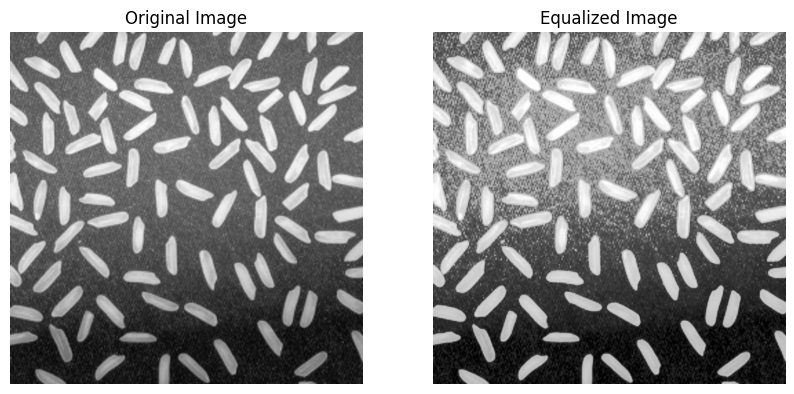

In [10]:

plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")  # Hide axis

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")  # Hide axis

plt.show()